In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

C:\Users\Joel Pires\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Joel Pires\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Joel Pires\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Joel Pires\AppData\Roaming\P

In [2]:
mnist = input_data.read_data_sets('mnist/', one_hot = False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
y_train = np.asarray(y_train, dtype = np.int32)
y_test = np.asarray(y_test, dtype = np.int32)

In [5]:
X_train.shape

(55000, 784)

In [6]:
X_test.shape

(10000, 784)

In [7]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
y_train

array([7, 3, 4, ..., 5, 6, 8])

Text(0.5, 1.0, 'Classe: 4')

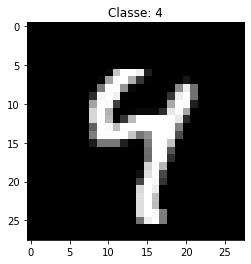

In [9]:
plt.imshow(X_train[2].reshape((28,28)), cmap = 'gray')
plt.title('Classe: ' + str(y_train[2]))

In [10]:
def create_network(features, labels, mode):
    
    input_layer = tf.reshape(features['X'], [-1, 28, 28, 1])
    
    convolution1 = tf.layers.conv2d(inputs = input_layer, filters = 32, kernel_size=[5,5], activation = tf.nn.relu,
                                  padding = 'same')

    pooling1 = tf.layers.max_pooling2d(inputs = convolution1, pool_size = [2,2], strides = 2)
    

    convolution2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu,
                                  padding = 'same')

    pooling2 = tf.layers.max_pooling2d(inputs = convolution2, pool_size = [2,2], strides = 2)
    

    flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])

    dense = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)

    dropout = tf.layers.dropout(inputs = dense, rate = 0.2, training=mode == tf.estimator.ModeKeys.TRAIN)
    

    output = tf.layers.dense(inputs = dropout, units = 10)
    

    predictions = tf.argmax(output, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)
    
    error = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = output)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
        training = optimizer.minimize(error, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = error, train_op = training)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = predictions)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = error, eval_metric_ops = eval_metrics_ops)
    

In [11]:
classifier = tf.estimator.Estimator(model_fn = create_network)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\JOELPI~1\\AppData\\Local\\Temp\\tmp9a4k9aoz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EED1F88278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
train_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_train}, y = y_train,
                                                       batch_size = 128, num_epochs = None, shuffle = True)
classifier.train(input_fn=train_function, steps = 200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\JOELPI~1\AppData\Local\Temp\tmp9a4k9aoz\model.ckpt.
INFO:tensorflow:loss = 2.3021092, step = 0
INFO:tensorflow:global_step/sec: 11.7789
INFO:tensorflow:loss = 0.05717957, step = 100 (8.493 sec)
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\JOELPI~1\AppData\Local\Temp\tmp9a4k9aoz\model.ckpt.
INFO:tensorflow:Loss for final step: 0.040482428.


In [13]:
test_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_test}, y = y_test, num_epochs = 1,
                                                      shuffle = False)
results = classifier.evaluate(input_fn=test_function)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-18-01:19:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JOELPI~1\AppData\Local\Temp\tmp9a4k9aoz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-18-01:19:45
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.9775, global_step = 200, loss = 0.06798178


{'accuracy': 0.9775, 'loss': 0.06798178, 'global_step': 200}

In [14]:
X_image_test = X_test[1]
X_image_test.shape

(784,)

In [15]:
X_image_test = X_image_test.reshape(1,-1)
X_image_test.shape

(1, 784)

In [16]:
predict_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_image_test}, shuffle = False)
pred = list(classifier.predict(input_fn = predict_function))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JOELPI~1\AppData\Local\Temp\tmp9a4k9aoz\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
pred[0]

2

Text(0.5, 1.0, 'Predicted Class: 2')

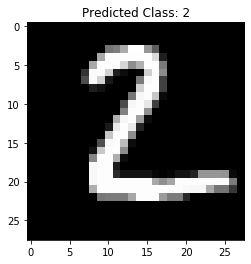

In [18]:
plt.imshow(X_image_test.reshape((28, 28)), cmap = 'gray')
plt.title('Predicted Class: ' + str(pred[0]))